# Day Four: Transforming DataFrames with Functions, Axes, Concatenation

This lesson introduces manipulation and application of DataFrames through its most powerful feature: custom functions as applied to values, columns, rows, or even entire DataFrames. For more advanced applications of the **split-apply-combine** workflow, see [this page](https://pandas.pydata.org/docs/user_guide/groupby.html) from the official documentation.

## Setup

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

## Datasets
* [TidyTuesday: The Programming Language Database](https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-03-21/readme.md) - A *.csv* of programming languages and their origins.
* [Data.Oregon.Gov: Public Library Statistics](https://dev.socrata.com/foundry/data.oregon.gov/8zw7-zgjw) - An API for accessing statistics related to public libraries in Oregon.

Start by reading in the PLDB dataset from a URL.

In [2]:
URL = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
pldb = pd.read_csv(URL, index_col="pldb_id")
pldb.head(5)

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,400.0,401,37.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,source.java,programming,java,java jav,11529980.0,https://en.wikipedia.org/wiki/Java_(programmin...,5242.0,11543.0,Java is a general-purpose computer programming...,15881.0,1995.0,2001.0,7818.0,javascript pizza ada csharp eiffel mesa modula...,True,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,349.0,351,48.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,source.js,programming,javascript,js _js bones cjs es es6 frag gs jake javascrip...,16046489.0,https://en.wikipedia.org/wiki/JavaScript,4264.0,8982.0,"JavaScript (), often abbreviated as JS, is a h...",9845.0,1995.0,2001.0,6131.0,java lua scheme perl self c python awk hyperta...,True,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,78.0,78,19.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,source.c,programming,c_cpp,c cats h idc,2160271.0,https://en.wikipedia.org/wiki/C_(programming_l...,6268.0,10585.0,"C (, as in the letter c) is a general-purpose,...",6021.0,2011.0,2001.0,7316.0,cyclone unified-parallel-c split-c cilk b bcpl...,True,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,339.0,342,52.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,source.python,programming,python,py cgi fcgi gyp gypi lmi py3 pyde pyi pyp pyt ...,9300725.0,https://en.wikipedia.org/wiki/Python_(programm...,7204.0,6849.0,Python is a widely used high-level programming...,23862.0,1991.0,2001.0,6342.0,jython micropython stackless-python cython abc...,True,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,177.0,182,37.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,source.sql,data,sql,sql cql ddl inc mysql prc tab udf viw,1222.0,https://en.wikipedia.org/wiki/SQL,3084.0,4159.0,SQL ( ( listen) ESS-kew-EL or ( listen) SEE-k...,29004.0,1986.0,2001.0,4153.0,sql-92 datalog linq powershell c sql-psm sqlpl...,True,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


## Refresher on Aggregation

We can use the aggregators [**.any()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any) and [**.all()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html#pandas.DataFrame.all) to manipulate the Boolean array returned by **.isna()** to answer questions about the frequency of null values in DataFrames. 

In [3]:
pldb.isna()

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
java,False,True,False,False,False,False,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
javascript,False,True,False,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
c,False,True,False,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
python,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
sql,False,True,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vtl,False,False,False,False,False,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,False,True,True
wizml,False,False,False,False,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,False,True,True
wolontis-bell-interpreter,False,True,False,False,True,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,False,True,True


First, let's manipulate this array to find out which columns have *at least* one null value. The **axis** parameter is extremely important in Pandas but a little tricky.

It represents which axis should be **reduced**, which means that aggregating by index=0 (index) will produce one value for each *column*, which aggregating by index=1 (column) will produce one value for each *row*.

In [4]:
pldb.isna().any(axis="index")

title                                False
description                           True
type                                 False
appeared                             False
creators                              True
website                               True
domain_name                           True
domain_name_registered                True
reference                             True
isbndb                                True
book_count                           False
semantic_scholar                      True
language_rank                        False
github_repo                           True
github_repo_stars                     True
github_repo_forks                     True
github_repo_updated                   True
github_repo_subscribers               True
github_repo_created                   True
github_repo_description               True
github_repo_issues                    True
github_repo_first_commit              True
github_language                       True
github_lang

In [5]:
pldb.isna().any(axis="columns") # Roll across columns = one per row

pldb_id
java                         True
javascript                   True
c                            True
python                       True
sql                          True
                             ... 
vtl                          True
wizml                        True
wolontis-bell-interpreter    True
xl                           True
xql                          True
Length: 4303, dtype: bool

We can use this same principle to count the number of NaNs per row.

In [6]:
pldb.isna().sum(axis="columns")

pldb_id
java                         15
javascript                   15
c                            14
python                       12
sql                          15
                             ..
vtl                          36
wizml                        37
wolontis-bell-interpreter    36
xl                           38
xql                          37
Length: 4303, dtype: int64

Or the total number of NaNs per column.

In [7]:
pldb.isna().sum(axis="index")

title                                   0
description                          3480
type                                    0
appeared                                0
creators                             3203
website                              2928
domain_name                          3588
domain_name_registered               3801
reference                            2314
isbndb                               3217
book_count                              0
semantic_scholar                     3545
language_rank                           0
github_repo                          3402
github_repo_stars                    3414
github_repo_forks                    3417
github_repo_updated                  3418
github_repo_subscribers              3418
github_repo_created                  3425
github_repo_description              3438
github_repo_issues                   3518
github_repo_first_commit             3567
github_language                      3829
github_language_tm_scope          

### Aggregation Task: Feature Coverage
A common task in data analysis is *feature coverage* computation, which can be defined as the number of non-null values per variable (rows) divided by the number of observations (rows). 

A feature with perfect coverage will have 1, a feature with only nulls will be 1.

Let's say you want to compute the feature coverage of the `pldb` DataFrame in order to decide which features are good candidates for statistical learning tasks.

First, let's get the number of rows in our pldb DataFrame using `.shape`.

In [8]:
n_rows = pldb.shape[0] # Rows first, then columns, so we want the [0] (first) value
print(n_rows, pldb.shape)

4303 (4303, 48)


Now, let's the get the total (sum) of the number of not null (notna) values per column in the DataFrame.

In [9]:
pldb.notna() # Now let's sum this for each COLUMN

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
java,True,False,True,True,True,True,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False
javascript,True,False,True,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False
c,True,False,True,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
python,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False
sql,True,False,True,True,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vtl,True,True,True,True,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False
wizml,True,True,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False
wolontis-bell-interpreter,True,False,True,True,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False


In [10]:
pldb.notna().sum(axis="index").head()

title          4303
description     823
type           4303
appeared       4303
creators       1100
dtype: int64

We're almost there! Now, we need to divide by the number of rows in the DataFrame, which we already computed as `n_rows`. Because operations on DataFrames and Series are *vectorized*, this will divide each integer in the series by that scalar value.

In [11]:
coverage = pldb.notna().sum(axis="index")/n_rows
coverage

title                                1.000000
description                          0.191262
type                                 1.000000
appeared                             1.000000
creators                             0.255636
website                              0.319545
domain_name                          0.166163
domain_name_registered               0.116663
reference                            0.462236
isbndb                               0.252382
book_count                           1.000000
semantic_scholar                     0.176156
language_rank                        1.000000
github_repo                          0.209389
github_repo_stars                    0.206600
github_repo_forks                    0.205903
github_repo_updated                  0.205670
github_repo_subscribers              0.205670
github_repo_created                  0.204044
github_repo_description              0.201023
github_repo_issues                   0.182431
github_repo_first_commit          

## Writing and Applying Functions

Now that you have sense of how the *axis* parameter works in a DataFrame, keep it mind as you learn how to apply your own functions.

### Processing JSON Files in Pandas: An Example API

First, let's look at the structure of an example JSON query result in both the browser and in Python. Today, we'll be focusing on statistics regarding the usage and expenditures of public libraries in Oregon.

This [Oregon Public Library Stastistics API](https://dev.socrata.com/foundry/data.oregon.gov/8zw7-zgjw) queries a database and retrieves all entries (that fit within a single JSON) that meet the selection requirements. The following query [https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023](https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023) returns information about public libraries in Oregon in the year 2023.

When opening the query in a browser like Firefox, you will notice that it like a **list** of **dictionaries**.

### Reading JSONS

Pandas supports conversion of JSON files to DataFrames through the [**pd.read_json()**](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html) function. Parsing JSON files with nested structure will require more tuning of parameters, but the default arguments will work for this simple API.

In [12]:
URL = "https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023"
libraries = pd.read_json(URL)
libraries.head()

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9.0,75.0,12.0,60.0,91.0,192.0,91.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,45.0,304.0,Actual count (we track each transaction as it ...,3,Wi-Fi extends outside building (left on 24/7),N/A (we don't track computer u

## Using Vectorized Functions on Series with Series.apply()

To apply a function to *each* value in a column, you need the [**pd.Series.apply**](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html#pandas.Series.apply) method. Given the *name* of a function for that returns one output value for one input value, it **vectorizes** that function over the column (or row).

### Series.apply() with Functions from Modules

To start, let's practice applying functions that have already been written. For common operations like summing, computing logarithms, or statistical measures, don't bother reinventing the wheel.

<Axes: >

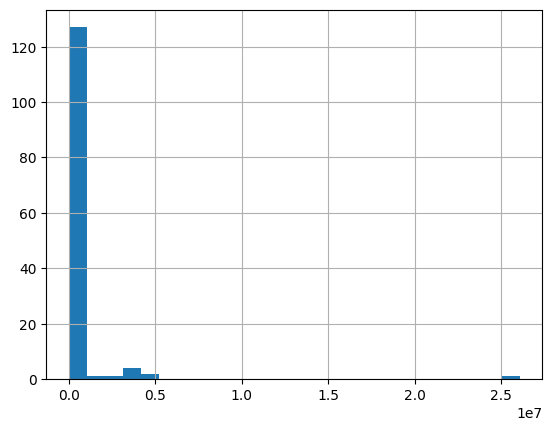

In [13]:
libraries["expendituresotheroperating"].hist(bins=25)

For modeling purposes, we might to *scale* a highly irregular variable using a logarithmic function. Luckily, the standard Python math module has [logarithmic functions](https://docs.python.org/3/library/math.html#math.log2) like **log2** available.

In [14]:
from math import log2 # log base 2
print(log2(8))
print(log2(256))

3.0
8.0


Because the logarithmic function will not work on 0s or NaNs (by definition), let's focus only libraries with nonzero operating costs using boolean indexing and rename that slice to `nonzero_costs`. You can see that even filtering out those 0s and NaNs gives us an extremely lopsided distribution.

<Axes: >

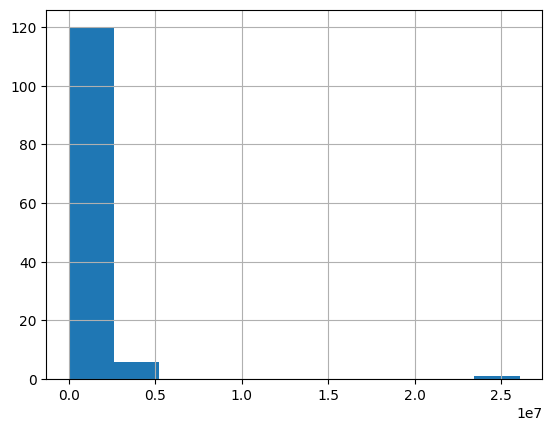

In [15]:
nonzero_costs = libraries[libraries["expendituresotheroperating"] > 0]
nonzero_costs["expendituresotheroperating"].hist()

Pass in the function by name. We do not use parentheses because **.apply()** will call the function on each value in the column individually for us.

In [16]:
nonzero_costs["expendituresotheroperating"].apply(log2)

0      13.367278
1      13.070624
2      19.644110
3      17.620048
4       7.643856
         ...    
131    17.733849
132    12.308055
133    17.819019
134    13.990015
135    11.822571
Name: expendituresotheroperating, Length: 127, dtype: float64

Let's run another histogram to see how logarithmic scaling changes the shape of the distribution.

<Axes: >

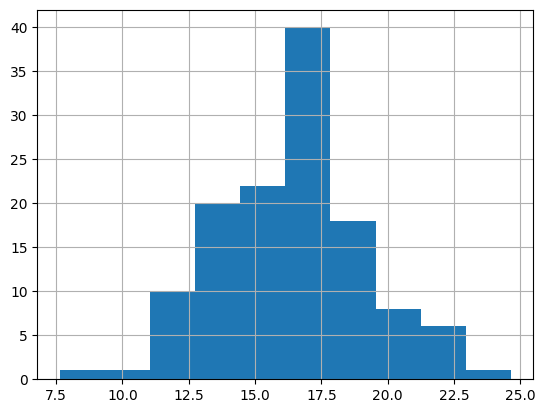

In [17]:
nonzero_costs["expendituresotheroperating"].apply(log2).hist()

### Designing a Function: Finding Custom Values in a String

Let's say you're interested in studying community for East Asian languages in public libraries in Oregon. You are interested in whether libraries stock materials in East Asian languages, namely Chinese (Cantonese or Mandarin), Korean, and Japanese. Inspecting each value in the `"collectionotherlanguages"` field is not practical. You need a function that (when vectorized) returns True if one or more strings of `["Chinese", "Mandarin", "Cantonese", "Korean", "Japanese"]` is present.

To develop a function from scratch, you need to know the expected input and output. From there, develop a *process* to get the output you want from the inputs in your DataFrame.

Let's write a quick function that takes in a single value from the `collectionotherlanguages` column and returns a Boolean.

In [18]:
# Helper function to determine if a library has East Asian materials
def has_east_asian_cols(s): # Single string as input
    if pd.isna(s): # If is NaN
        return False
    ea_languages = ["Chinese", "Mandarin", "Cantonese", "Korean", "Japanese", "Vietnamese"]
    for lang in ea_languages:
        if lang in s:
            return True
    return False

Before we apply it our DataFrame, let's test it on a few sample input values. We want to test at least one `True` case and at least one `False` case.

In [19]:
print(has_east_asian_cols("Arabic;Chinese"))
print(has_east_asian_cols("French"))
print(has_east_asian_cols("French"))

True
False
False


In [20]:
libraries["collectionotherlanguages"].apply(has_east_asian_cols)

0      False
1      False
2      False
3       True
4      False
       ...  
131     True
132     True
133    False
134    False
135     True
Name: collectionotherlanguages, Length: 136, dtype: bool

We can sum this Boolean array to determine how many public libraries in Oregon have East Asian materials.

In [21]:
libraries["collectionotherlanguages"].apply(has_east_asian_cols).sum()

55

Now that we're satisfied with this column, let's add it as a new column called `has_ea_cols` to the `lib_subset` DataFrame.

In [22]:
libraries["has_ea_cols"] = libraries["collectionotherlanguages"].apply(has_east_asian_cols)
libraries

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9.0,75.0,12.0,60.0,91.0,192.0,91.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,45.0,304.0,Actual count (we track each transaction as it ...,3,Wi-Fi extends outside building (left on 24/7),N/A (we don't trac

Now that we have a dedicated column, we can group the libraries by whether or not they have East Asian questions using [**groupby**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby). For example, do the libraries with more diverse collections serve more `registeredusers`? We can test by getting the median of the two groups.

In [23]:
libraries.groupby("has_ea_cols")["registeredusers"].median()

has_ea_cols
False    1512.5
True     7914.5
Name: registeredusers, dtype: float64

### Edge Case: Functions that Take in More than One Argument

Let's say you want to apply that takes in an additional argument. For example, the **math.log** functions takes in a second argument representing the base of the logarithm.

In [24]:
from math import log
log(100, 10) # log base 10 of 100

2.0

Let's say you want to get the log base 10 of the `"facilitiessqfttotal"` column. Pass additional arguments to the **.apply()** function by using the `args=` parameter.

In [25]:
libraries["facilitiessqfttotal"].apply(log, args=(10,))

0      2.628389
1      2.937016
2      4.691700
3      3.970812
4      2.982271
         ...   
131    4.457534
132    3.571243
133    4.340008
134    3.375846
135    3.622421
Name: facilitiessqfttotal, Length: 136, dtype: float64

## Aggregating Rows or Columns with DataFrame.apply()

What if you wanted to operate on a DataFrame by aggregating across columns or rows? What if you want an entire column or row as input? That's where the powerful and flexible [**DataFrame.apply()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) function comes in.

The input to **DataFrame.apply()** depends on whether you pass in a row `axis="columns"` or a column `axis="index"`.

## Aggregating with Functions Along Columns

When passing in a row, you can refer to specific values within the DataFrame using column names.

In [26]:
# Returns a boolean given a **row** in a DataFrame 
def has_fines(row):
    if row["finesadultmaterials"] == "Yes" or row["finesyamaterials"] == "Yes" or row["fineschildrensmaterials"] == "Yes":
        return True
    return False

In [27]:
libraries.apply(has_fines, axis="columns") 

0      False
1      False
2      False
3      False
4       True
       ...  
131     True
132     True
133    False
134    False
135     True
Length: 136, dtype: bool

When we're satisfied with the results, we can assign it back to the parent DataFrame to create a new column.

In [28]:
libraries["has_fines"] = libraries.apply(has_fines, axis="columns") 

## Aggregating with Functions on Rows

By switching our `axis` argument to `index`, we can write functions that take in columns instead. Remember that you will need to use either functions that take in vectorized input or functions that reference specific rows. Let's practice with **numpy**'s standard deviation function [**np.std()**](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to compute the standard deviation of each **numeric** column in the `libraries` DataFrame.

In [29]:
import numpy as np
def standard_deviation(col):
    # We need to return np.Nan for all categorical columns
    if col.dtype == 'object' or col.dtype == 'Categorical':
        return np.nan
    return np.std(col) # Returns the standard deviation of a column

In [30]:
libraries.apply(standard_deviation, axis="index").dropna()

year                         0.000000
zip                        284.568765
mailingzip                 284.568765
centrallibrary               0.085433
branches                     2.311012
                             ...     
plscpublibdefinition         0.120373
referencetransactions    18612.826681
feesnonresident             39.611534
has_ea_cols                  0.490778
has_fines                    0.467823
Length: 138, dtype: float64

### Multi-Hots

**Bonus**: Interested in statistics or machine learning? It's so common for raw data to represented in that awkward `;` or `,` separated format that Pandas has a built-in way to convert one **Series** with multiple categorical values into a **DataFrame** of binary variables. If there are *n* possible categorical features, this will create *n* binary variables. This [**Series.str.get_dummies()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html#pandas.Series.str.get_dummies) function for creating dummy variables is also called a multi-hot. It's essential when working with models that require numeric features, as it translates strings into 0s and 1s.



In [31]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";")

,Arabic,Chinese (including Mandarin & Cantonese),French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
132,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
133,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Want to add this back into the `libraries` DataFrame as 18 new variables? We can use **pd.concat()** to combine the DataFrames along the **columns** axis.

In [32]:
lang_multi_hot = libraries["collectionotherlanguages"].str.get_dummies(sep=";")
pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols,has_fines,Arabic,Chinese (including Mandarin & Cantonese),French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192

In [33]:
libraries = pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

Let's use another convenient function to clean up our data: [**Series.str**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html#pandas.Series.str) methods  perform quick string-based operations like replacing patterns and adjusting casing. We can apply these functions to make casing consistent across features, as languages like `French` are capitalized.

First, let's make the Chinese column more concise using **.rename()** and the following mapping: `{"Chinese (including Mandarin & Cantonese)":"Chinese"}`.

In [34]:
libraries.rename(columns={"Chinese (including Mandarin & Cantonese)":"Chinese"})

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols,has_fines,Arabic,Chinese,French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9.0,75.0,12.0,60.0,

Once that looks good, let's apply that to the `libraries` DataFrame by assigning that copy back to `libraries`.

In [35]:
libraries = libraries.rename(columns={"Chinese (including Mandarin & Cantonese)":"Chinese"})
libraries["Chinese"].sum() # There are this many libraries in Oregon with Chinese-language collections

52

Let's say I want to find out **how man** libraries per county offer materials in each of the following languages: Japanese, Korean, Chinese, and Vietnamese. We can use **groupby** and **aggregation** to count the number of rows (libraries) that offer materials in each language per county.

In [36]:
libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,0,0,1,0
Benton,1,1,1,0
Clackamas,9,9,9,9
Clatsop,0,0,0,0
Columbia,1,2,2,0
Coos,4,2,4,1
Crook,0,0,1,0
Curry,3,3,3,1
Deschutes,0,0,0,0


This is all well and good, but, for plotting purposes, I want to filter out counties that have no East Asian language materials whatsoever.
Let's create a boolean index that identifies rows that sum to **more than 0**. We will need to use an *axis* argument to sum up along the columns for this.

In [37]:
by_county = libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()
by_county.sum(axis="columns") > 0

county
Baker          True
Benton         True
Clackamas      True
Clatsop       False
Columbia       True
Coos           True
Crook          True
Curry          True
Deschutes     False
Douglas        True
Gilliam       False
Grant         False
Harney        False
Hood River    False
Jackson        True
Jefferson     False
Josephine      True
Klamath        True
Lake          False
Lane           True
Lincoln        True
Linn          False
Malheur        True
Marion        False
Morrow        False
Multnomah      True
Polk          False
Sherman       False
Tillamook     False
Umatilla      False
Union          True
Wallowa        True
Wasco         False
Washington     True
Wheeler       False
Yamhill        True
dtype: bool

Applying this index reduces to `by_county` gives us a subset that only includes counties with at least one East Asian language.

In [38]:
by_county[by_county.sum(axis="columns") > 0]

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,0,0,1,0
Benton,1,1,1,0
Clackamas,9,9,9,9
Columbia,1,2,2,0
Coos,4,2,4,1
Crook,0,0,1,0
Curry,3,3,3,1
Douglas,5,3,5,2
Jackson,1,1,1,0


Let's plot this information with a bar chart. Remember to label and title appropriately.

<Axes: title={'center': 'East Asian Language Collections in Oregon Public Libraries'}, xlabel='County', ylabel='Libraries'>

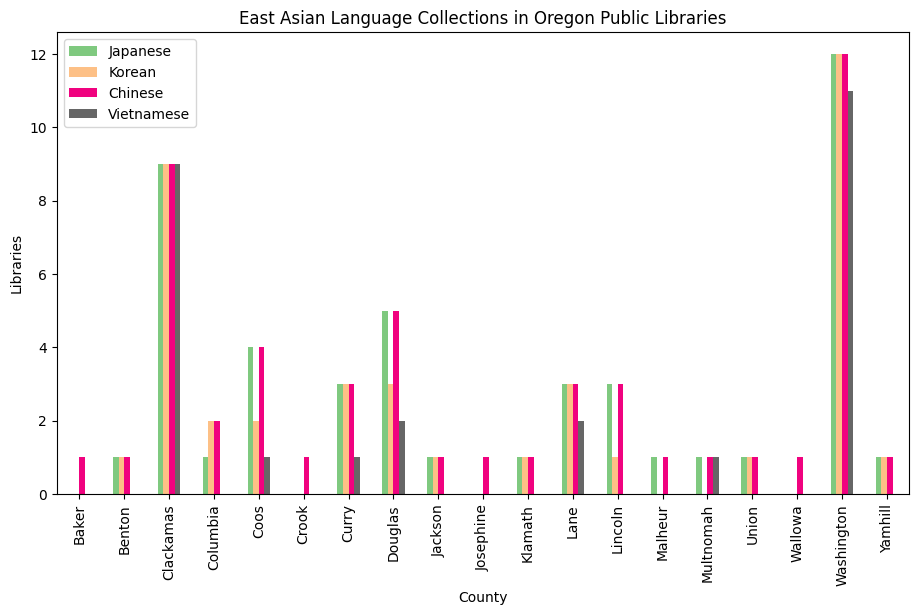

In [39]:
by_county[by_county.sum(axis="columns") > 0].plot(kind="bar", 
                                                  figsize=(11,6),
                                                  title="East Asian Language Collections in Oregon Public Libraries",
                                                  xlabel="County",
                                                  ylabel="Libraries",
                                                  colormap="Accent"
                                                 )

## After Class Bonus: Concatenating DataFrames
Most APIs return a limited number of rows per query, as APIs are designed to transmit small pieces of data at a time over the internet. Therefore, in order to get a full picture of the data, you will need to make several calls.

We're going to use the "year" parameter to get one year's worth of data at a time, just as we did for 2023, but now we're going to get the data for 2022, 2021, 2020, 2019, and 2018 as well.

In [40]:
import time
base_url = "https://data.oregon.gov/resource/8zw7-zgjw.json?year="
years = ["2023", "2022", "2021", "2020", "2019", "2018"]
data = []

# Constructing the loop, identify what needs to change (the year)
for year in years:
    query_url = base_url + year # creates a valid url
    print("Getting data from", query_url) # test the url
    frame = pd.read_json(query_url) # read the JSON to a DataFrame
    data.append(frame) # Add the DataFrame to a list
    time.sleep(2)
    print("Waiting two seconds to be polite.")

Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2022
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2021
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2020
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2019
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2018
Waiting two seconds to be polite.


Once you have a working list of DataFrames, you can concatenate them into one DataFrame named `all_libraries` using [**pd.concat**](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).
Remember, you need to specify a list **AND** an axis for concatenation to work as intended. This operation is only safe to do because we know that each successive set of rows *has the same columns* as the parent.

In [41]:
all_libraries = pd.concat(data, axis="index")

The combined `all_libraries` DataFrame has 829 rows, representing 6 years of statistics. 

In [42]:
all_libraries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 136
Columns: 168 entries, libid to facilitiesconstructiondate
dtypes: bool(1), float64(121), int64(13), object(33)
memory usage: 1.1+ MB
